<a href="https://colab.research.google.com/github/shivasaxena23/Experiments-DNN-Offloading/blob/main/Alpha_Non_Negligible_VariableSizeDNN_Average_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import random
import math

In [38]:
def randComm(x,t=0):
    r = random.random()
    r = r + t*(1-r)
    return r*x

In [39]:
def randCommTwoWay(x,t=0):
    r = random.random()
    return x/2+r*(x)

In [40]:
def randCommTwoWayExt(x,t=0):
    r = random.random()
    return x/4+r*(3*x/2)

In [41]:
def randCommTwoWayExt2(x,t=0):
    r = random.random()
    return x/8+r*(7*x/4)

In [42]:
comm = 16.384
#comm = 14.90

One Way Communication and One Way Computation 

In [43]:
rho_avg = []
rho_avg_min = []
rho_worst = []
rho_worst_min = []

rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [44]:
checker_alpha = []
checker_comp = []
checker_comm = []

In [45]:
Topt_total = []
Talg_total = []

In [46]:
rho_matrix = []

In [47]:
a = [1,2,3]
b = [2,3,4]
np.dot(a[3:],b[3:])
b[:1]


[2]

All Alpha conditions

In [48]:
for length in range(5,30,5):
    rho_worst_min = []
    rho_avg_min = []
    for comm in range(1,2400,80):
        if comm%40 == 0:
          print(comm)
        rho_min = []
        for r in range(10000):
            current_comm = randComm(comm)
            current_comps = []
            current_comms = []
            Topt_vec = []
            Talg_vec = []
            #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
            #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
            #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
            current_comms_uniform = []
            current_comp_uniform = [1+randComm(20) for i in range(length)]
            #current_alpha_uniform = [0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2]
            current_alpha_uniform = [random.random() for i in range(length)]
            min_alpha = min(current_alpha_uniform)
            
            #Get comm latencies
            for l in range(len(current_comp_uniform)):
                if l == 0:
                    current_comms_uniform.append(comm)
                else:
                    current_comms_uniform.append(randComm(current_comms_uniform[l-1]))
            current_comms_uniform.append(0)
            
            #ALG
            
            best_min = comm
            i = 0
            comms_counter = 1
            best_point_min = 0
            for l in current_comp_uniform:

                current_comp = l
                current_comm = current_comms_uniform[comms_counter]
                
                current_comps.append(current_comp)
                current_comms.append(current_comm)

                if (1-min_alpha)*sum(current_comps) + current_comm < best_min:
                    best_point_min = i+1
                    best_min = (1-min_alpha)*sum(current_comps) + current_comm

                i = i + 1
                comms_counter = comms_counter + 1
            
            if best_point_min != length and best_point_min != 0:
                Talg_min = sum(current_comps[:best_point_min]) + current_comms[best_point_min-1] + np.dot(current_alpha_uniform[best_point_min:],current_comp_uniform[best_point_min:])
            elif best_point_min == 0:
                Talg_min = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point_min:],current_comp_uniform[best_point_min:])
            elif best_point_min == length:
                Talg_min = sum(current_comps[:best_point_min])
                
            current_comps_temp = current_comps
            current_comms_temp = current_comms
            
            alg_best_point = best_point_min
            
            #OPT
            
            current_comps = []
            current_comms = []
            
            best = current_comms_uniform[0] + np.dot(current_alpha_uniform,current_comp_uniform)
            i = 0
            comms_counter = 1
            best_point = 0
            for l in current_comp_uniform:

                    
                current_comp = l
                current_comm = current_comms_uniform[comms_counter]
                
                current_comps.append(current_comp)
                current_comms.append(current_comm)
                
                if sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:]) < best:
                    best_point = i+1
                    best = sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:])
            
                i = i + 1
                comms_counter = comms_counter + 1
            
            if best_point != length and best_point != 0:
                Topt = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
            elif best_point == 0:
                Topt = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
            elif best_point == length:
                Topt = sum(current_comps[:best_point])
            
            opt_best_point = best_point
            
            if current_comps != current_comps_temp:
                print(current_comps,current_comps_temp)
            
            if current_comms != current_comms_temp:
                print(current_comms,current_comms_temp)
            
            if opt_best_point < alg_best_point:
                print ("failed point",opt_best_point,alg_best_point)
            
            if Talg_min < Topt:
                print ("failed makespan",Topt,Talg_min,opt_best_point,alg_best_point)
                checker_alpha.append(current_alpha_uniform)
                checker_comp.append(current_comp_uniform)
                checker_comm.append(current_comms_uniform)
            
            if (Talg_min/Topt) > 2:
                print ("failed proof",Topt,Talg_min,opt_best_point,alg_best_point)
            
            rho_min.append(Talg_min/Topt)
            '''
            Topt_vec.append(Topt)
            Talg_vec.append(Talg_min)
            #print(Talg,Topt,i,comm,best)
            '''
            
        rho_worst_min.append(np.max(rho_min))
        rho_avg_min.append(np.mean(rho_min))

        '''
        rho_avg.append(np.mean(rho))
        rho_median.append(np.median(rho))
        rho_60.append(np.percentile(rho,60))
        rho_70.append(np.percentile(rho,70))
        rho_80.append(np.percentile(rho,80))
        Topt_total.append(np.mean(Topt_vec))
        Talg_total.append(np.mean(Talg_vec))
        '''
    rho_matrix.append(rho_avg_min)

In [49]:
np.array(rho_matrix).shape

(5, 30)

In [50]:
with open('Alpha-Experiment-Non_Negligible-5.npy_1', 'wb') as f:
  np.save(f,np.array(rho_matrix))

In [51]:
with open('Alpha-Experiment-Non_Negligible-5.npy_1', 'rb') as f:
  matrix = np.load(f)

In [52]:
matrix.shape

(5, 30)

Text(0, 0.5, 'Competitive Ratio')

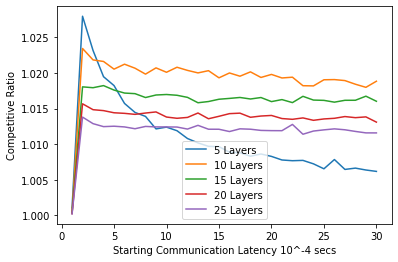

In [53]:
#2
plt.plot(range(1,31),rho_matrix[0],label="5 Layers")
plt.plot(range(1,31),rho_matrix[1],label="10 Layers")
plt.plot(range(1,31),rho_matrix[2],label="15 Layers")
plt.plot(range(1,31),rho_matrix[3],label="20 Layers")
plt.plot(range(1,31),rho_matrix[4],label="25 Layers")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


In [54]:
for i in rho_matrix:
  print(np.max(i))

1.0279753188003617
1.0234434302004398
1.0182253862342012
1.0156681850700082
1.0138007557644297
